### Creating Random Dataset

In [1]:
import numpy as np

In [13]:
x_np = np.random.randn(100, 1)
noise = np.random.normal(scale=0.1, size=(100,1))
y_np = np.reshape(5 * x_np + 2 + noise, (-1))

In [14]:
import matplotlib.pyplot as plt

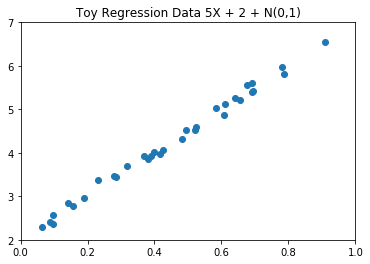

In [15]:
plt.scatter(x_np, y_np)
plt.ylim(2,7)
plt.xlim(0,1)
plt.title("Toy Regression Data 5X + 2 + N(0,1)")
plt.show()

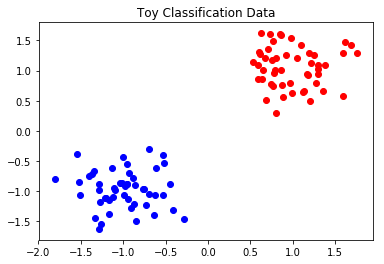

In [16]:
np.random.seed(0)
x0 = np.random.multivariate_normal(mean=np.array((-1,-1)), cov=0.1*np.eye(2), size=(50,))
y0 = np.zeros((50,), dtype=np.int32)

x1 = np.random.multivariate_normal(mean=np.array((1,1)), cov=0.1*np.eye(2), size=(50,))
y1 = np.ones((50,), dtype=np.int32)

plt.scatter(x0[:, 0], x0[:, 1], color="blue")
plt.scatter(x1[:, 0], x1[:, 1], color="red")
plt.title("Toy Classification Data")
plt.show()

### Linear Regression

In [39]:
import tensorflow as tf

x = tf.placeholder(tf.float32, (100,1))
y = tf.placeholder(tf.float32, (100,))

w = tf.Variable(tf.random_normal((1,1)))
b = tf.Variable(tf.random_normal((1,)))

y_pred = tf.matmul(x,w) + b
l = tf.reduce_sum((y-y_pred)**2)
train_op = tf.train.AdamOptimizer(0.001).minimize(l)

n_steps = 1000
loss_list = list()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(n_steps):
        data = {x: x_np, y: y_np}
        _, loss = sess.run([train_op, l], feed_dict=data)
        loss_list.append(loss)
    w_final, b_final = sess.run([W, b])
    y_pred_np = sess.run(y_pred, feed_dict={x: x_np})

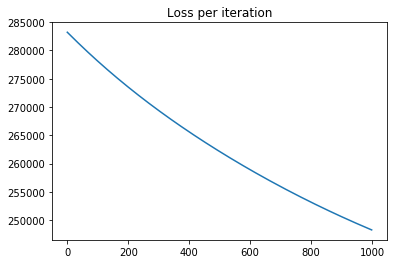

In [41]:
plt.plot(range(1000), loss_list)
plt.title("Loss per iteration")
plt.show()

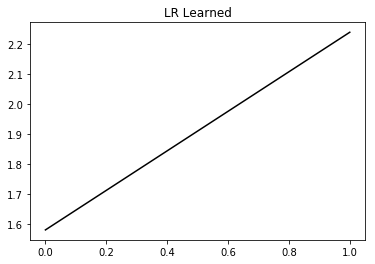

In [38]:
x_left = 0
y_left = w_final[0]*x_left + b_final
x_right = 1
y_right = w_final[0]*x_right + b_final
plt.plot([x_left, x_right], [y_left, y_right], color='k')
plt.title("LR Learned")
plt.show()

### Logistic Regression

In [46]:
x = tf.placeholder(tf.float32, (100,2))
y = tf.placeholder(tf.float32, (100,))

w = tf.Variable(tf.random_normal((2,1)))
b = tf.Variable(tf.random_normal((1,)))

y_logit = tf.squeeze(tf.matmul(x,w) + b)
y_one_prob = tf.sigmoid(y_logit)
y_pred = tf.round(y_one_prob)

entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
l = tf.reduce_sum(entropy)
train_op = tf.train.AdamOptimizer(0.01).minimize(l)

x_np = np.vstack([x0, x1])
y_np = np.concatenate([y0, y1])

n_steps = 1000
loss_list = list()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(n_steps):
        data = {x: x_np, y: y_np}
        _, loss = sess.run([train_op, l], feed_dict=data)
        loss_list.append(loss)
    w_final, b_final = sess.run([W, b])
    y_pred_np = sess.run(y_pred, feed_dict={x: x_np})


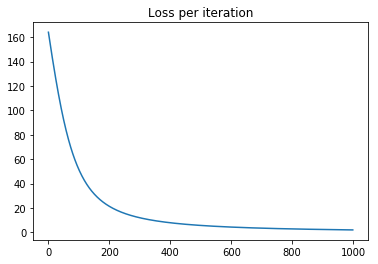

In [47]:
plt.plot(range(1000), loss_list)
plt.title("Loss per iteration")
plt.show()